# Reproducible Data Analysis with Jupyter

Jake Vanderplas

When done, linearize by using "restart and run all" 
- this helps check your work

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
from jflow.data import get_data

In [3]:
df = get_data()

#unix command

In [4]:
!head fremont.csv  

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [5]:
df.shape

(54000, 3)

In [6]:
df.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54000 entries, 2012-10-03 00:00:00 to 2018-11-30 23:00:00
Data columns (total 3 columns):
East     53991 non-null float64
West     53991 non-null float64
Total    53991 non-null float64
dtypes: float64(3)
memory usage: 1.6 MB


In [8]:
df.describe()

,East,West,Total
count,53991.000000,53991.000000,53991.000000
mean,57.162879,54.416569,111.579448
std,82.455352,71.429187,140.470416
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54000 entries, 2012-10-03 00:00:00 to 2018-11-30 23:00:00
Data columns (total 3 columns):
East     53991 non-null float64
West     53991 non-null float64
Total    53991 non-null float64
dtypes: float64(3)
memory usage: 1.6 MB


In [10]:
df.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


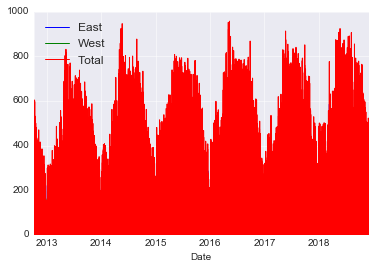

In [11]:
df.plot()

A little dense.  These are hourly counts over 4 years.

Resample, weekly...

`resample`: Convenience method for __frequency conversion and resampling of time series__. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

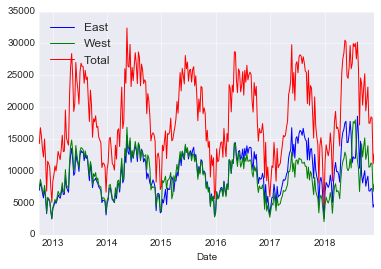

In [12]:
 df.resample('W').sum().plot()

In [13]:
plt.style.available

['grayscale',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-bright',
 'bmh',
 'seaborn-deep',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-muted',
 'classic',
 'seaborn-white',
 'seaborn-poster',
 'fivethirtyeight',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-talk',
 'seaborn-ticks',
 'ggplot',
 'seaborn-dark-palette']

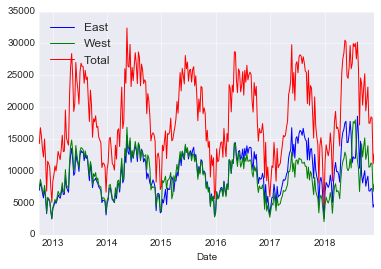

In [14]:
df.resample('W').sum().plot()

look for anual growth or trend. using daily sampling and rolling windows.

each of the points is a rolling sum of the previous 365 days.

In [15]:
df.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


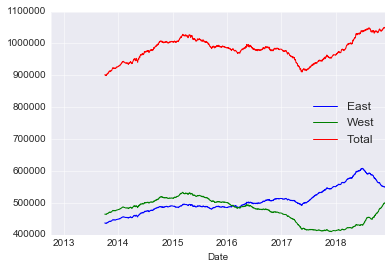

In [16]:
df.resample('D').sum().rolling(365).sum().plot()

Axes are a little suspect because they don't go to zero.

Note how this is accomplished by setting 'ax'.    

(0, 1100000.0)

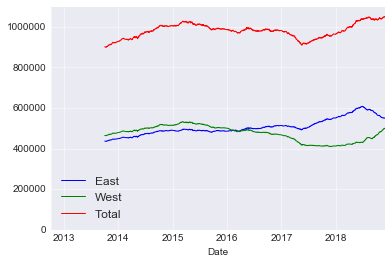

In [17]:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

Now the change does not appear as dramatic.

Add a 'total' column

(0, 1100000.0)

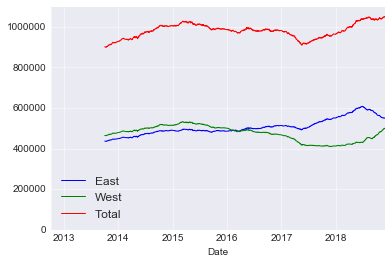

In [18]:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

Total is pretty consistent.  About a million per year.

Look at a trend within a group.  Look at the time of day...

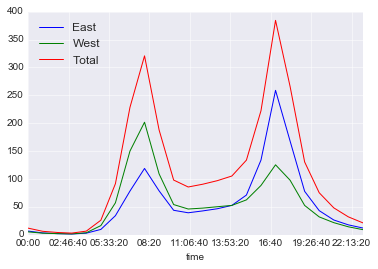

In [19]:
df.groupby(df.index.time).mean().plot()

Eastbound peaks opposite of West.

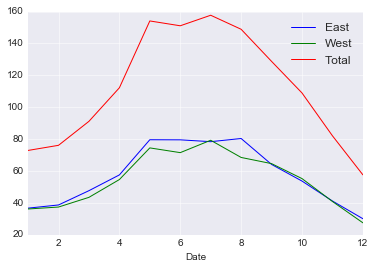

In [20]:
df.groupby(df.index.month).mean().plot()

Now, to see the 'whole' data

In [21]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5] #look at the first 5x5 block

#each column is a day, each row is an hour

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [22]:
#this gives you a line for each day in all of the years
#OFF during function and package debugging because LONG execution time
#pivoted.plot(legend=False)


In [23]:
#pull back the opacity to see density better...
#OFF during function and package debugging because LONG execution time
#pivoted.plot(legend=False, alpha=0.01)


Hypothesis: peaks are weekdays.  Broad usage (lower) arc is probably weekend.

In [24]:
#see the docstring
get_data?

In [25]:
#see the source code
get_data??